In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
data.sample(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
695,80201829,Movie,Ankur Arora Murder Case,Sohail Tatari,"Kay Kay Menon, Tisca Chopra, Arjun Mathur, Pao...",India,"October 15, 2017",2013,TV-14,127 min,"Dramas, International Movies, Thrillers",A young medical intern sets out to fight for j...
5944,80130521,TV Show,The Worst Witch,NaN,"Bella Ramsey, Clare Higgins, Meibh Campbell, R...","United Kingdom, Germany","July 26, 2019",2019,TV-Y7,3 Seasons,"British TV Shows, Kids' TV","After stumbling into a school for witches, a b..."
3410,80222177,Movie,Rip Tide,Rhiannon Bannenberg,"Debby Ryan, Genevieve Hegney, Andrew Creer, Na...","Australia, United Arab Emirates","January 15, 2018",2017,TV-Y7,87 min,"Children & Family Movies, Dramas, Sports Movies","Following an embarrassing viral video, a New Y..."
5892,80100172,TV Show,Dark,NaN,"Louis Hofmann, Oliver Masucci, Jördis Triebel,...","Germany, United States","June 21, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A missing child sets four families on a franti...


In [3]:
data.shape

(6234, 12)

****DATA VISUALIZATION****

In [4]:
df = data.copy()
df.shape


(6234, 12)

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7efd9c9de4a8>,
 [Text(-0.6014719407703795, 0.9209948449724967, 'Movie'),
  Text(0.6014718545406157, -0.9209949012863603, 'TV show')],
 [Text(-0.32807560405657055, 0.5023608245304527, '68.4%'),
  Text(0.328075557022154, -0.5023608552471055, '31.6%')])

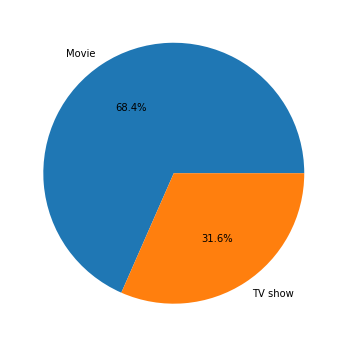

In [6]:


labels = ['Movie', 'TV show']
size = data['type'].value_counts()
plt.figure(figsize=(9,6))
plt.pie(size,labels=labels,autopct='%1.1f%%')
 

*from above we can see that dataset contains more number of Movies  *

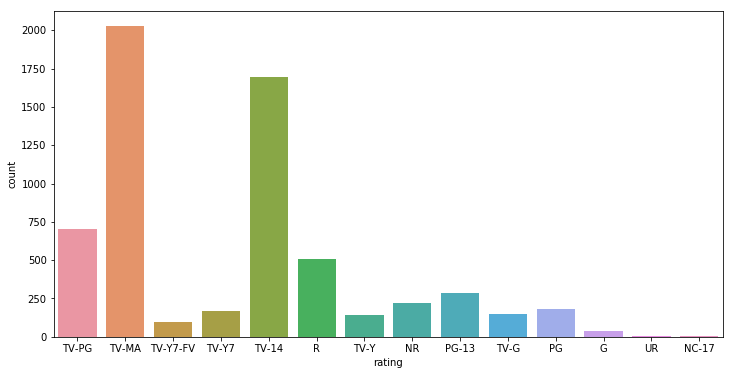

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(data['rating'])

TV-MA: MATURE AUDIENCE ONLY 
This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17. .

TV-14: PARENTS STRONGLY CAUTIONED
This program contains some material that parents would find unsuitable for children under 14 years of age. Parents are strongly urged to exercise greater care in monitoring this program and are cautioned against letting children under the age of 14 watch unattended.

Text(0.5, 1.0, 'rating ')

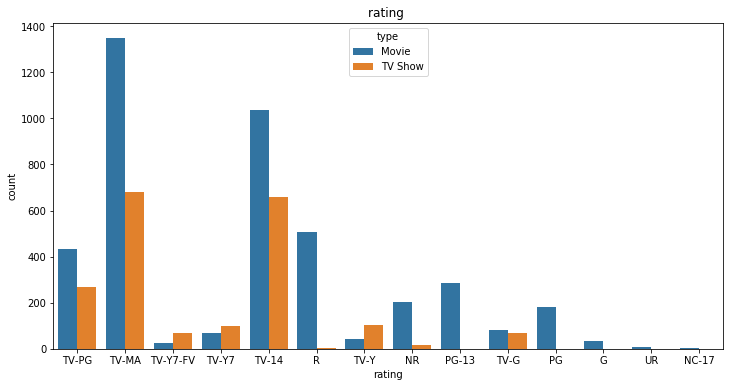

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(x='rating',hue='type',data=data).set_title('rating ')

Text(0.5, 1.0, 'Movies and TV shows added')

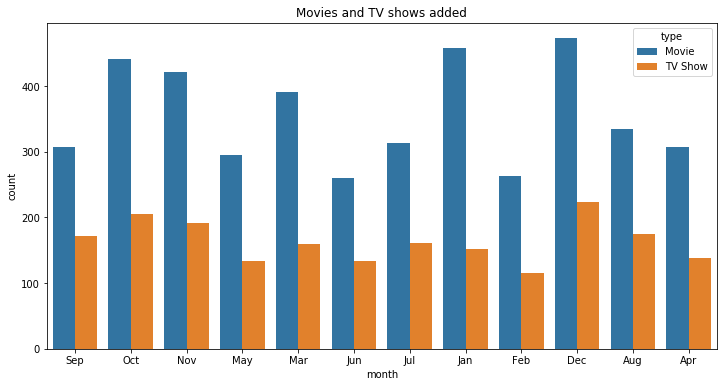

In [9]:
df2 = data.copy()
df2 = df2[df2['date_added'].notna()]
df2['date']=pd.to_datetime(df2['date_added'])
df2['month']=df2['date'].dt.strftime('%b')
df2['month'].value_counts()
plt.figure(figsize=(12,6))
sns.countplot(x='month',hue='type',data=df2).set_title('Movies and TV shows added')

Most of the Movies and TVshow were added to netfix in Jan,Oct,Nov,Dec

Text(0.5, 1.0, 'Movies and TV shows added')

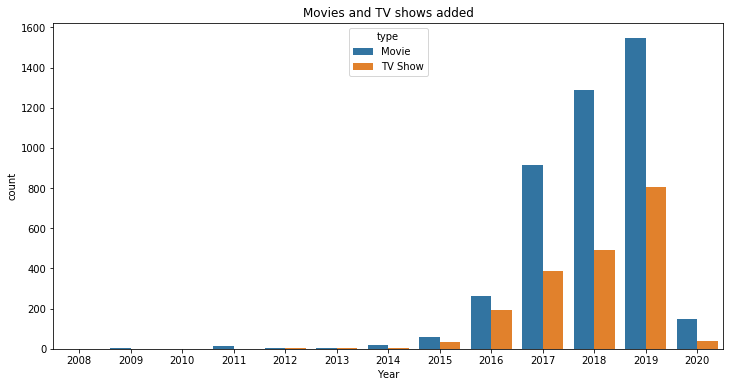

In [10]:
df2['date']=pd.to_datetime(df2['date_added'])
df2['Year']=df2['date'].dt.strftime('%Y')
plt.figure(figsize=(12,6))
sns.countplot(x='Year',hue='type',data=df2).set_title('Movies and TV shows added')   


Most of movie and tvshow was added in 2019 and 2018

Text(0.5, 1.0, 'release_year')

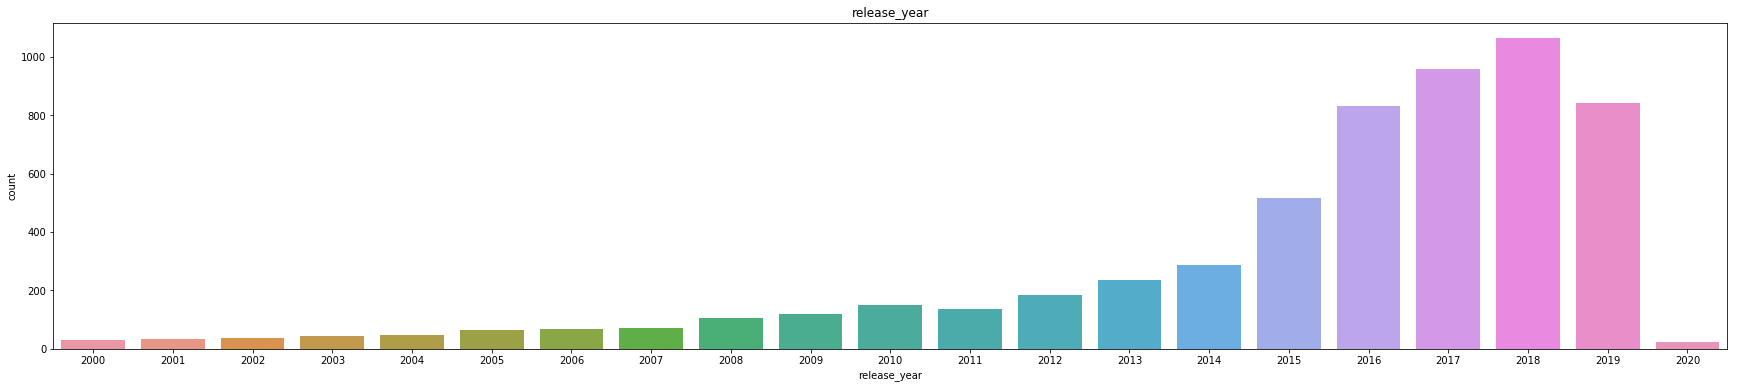

In [11]:
df3=data[data.release_year>1999]
plt.figure(figsize=(30,6))
sns.countplot('release_year',data=df3).set_title('release_year')

In [12]:
df5=data['director'].value_counts()
df5=df5[df5>3]
df5

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
                          ..
Mike Newell                4
William Lau                4
Farhan Akhtar              4
Chris Stokes               4
Hrishikesh Mukherjee       4
Name: director, Length: 88, dtype: int64

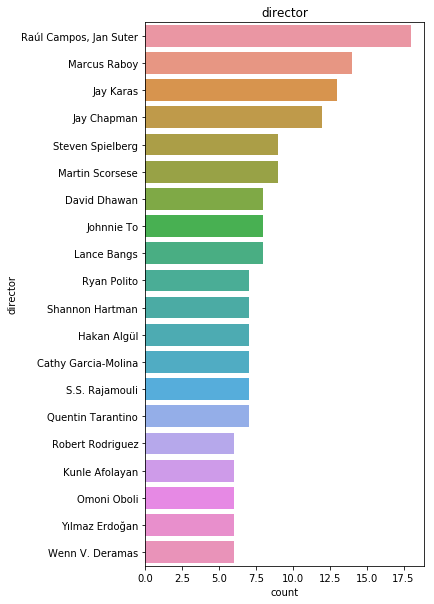

In [13]:

plt.figure(figsize=(5,10))
sns.countplot(y='director',data=data,order = data['director'].value_counts().head(20).index).set_title('director')
plt.show()

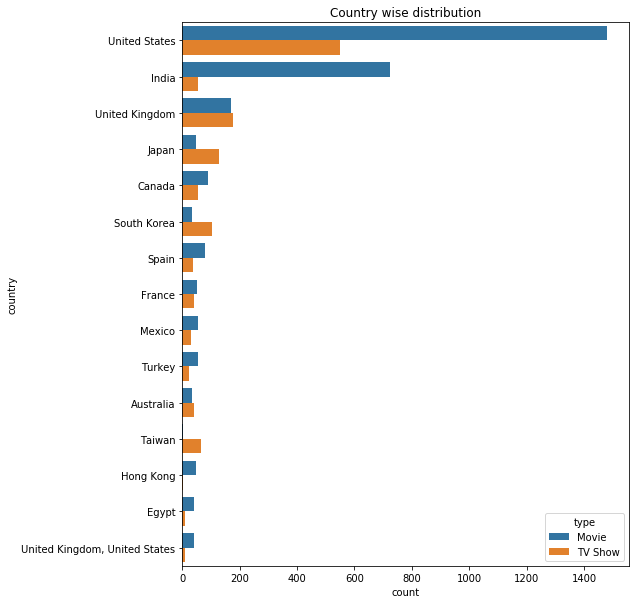

In [14]:
plt.figure(figsize=(8,10))
sns.countplot(y='country',hue='type',data=data,order = data['country'].value_counts().head(15).index).set_title('Country wise distribution')
plt.show()

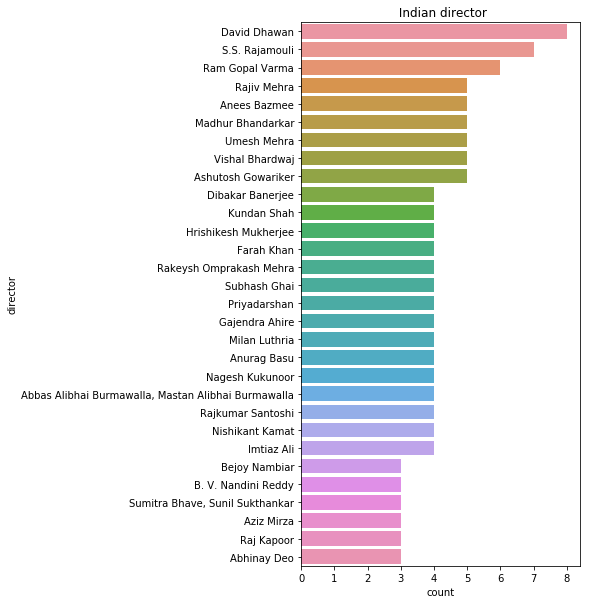

In [15]:
df6=data[data.country=='India']
plt.figure(figsize=(5,10))
sns.countplot(y='director',data=df6,order = df6['director'].value_counts().head(30).index).set_title(' Indian director')
plt.show()

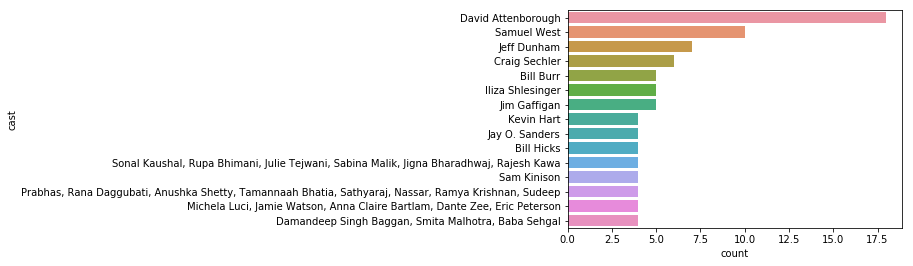

<Figure size 360x720 with 0 Axes>

In [16]:
sns.countplot(y='cast',data=data,order = data['cast'].value_counts().head(15).index) 
plt.figure(figsize=(5,10))
plt.show()

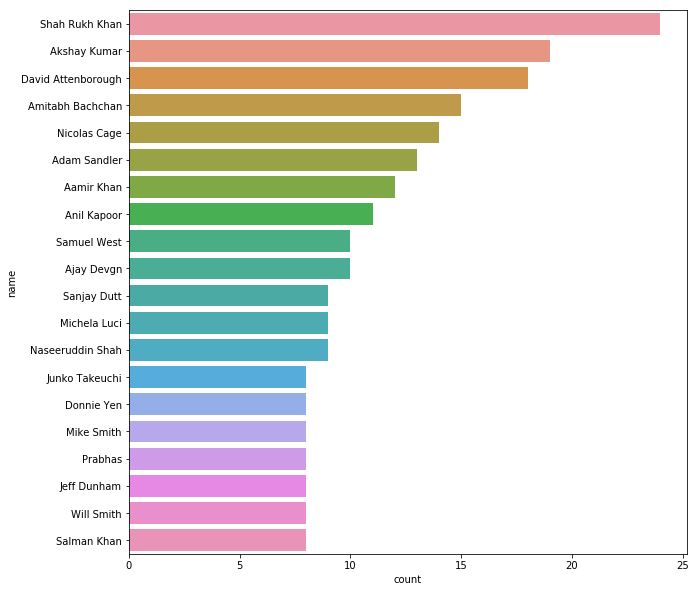

In [17]:
cast=[]
for i in data['cast']:
    cast.append(i)
newls=[]
for i in cast:
    newls.append(str(i).split(',')[0])
df7=pd.DataFrame(newls,columns=['name'])
df7=df7.drop(df7.query('name=="nan"').index)
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=df7,order = df7['name'].value_counts().head(20).index)

plt.show()

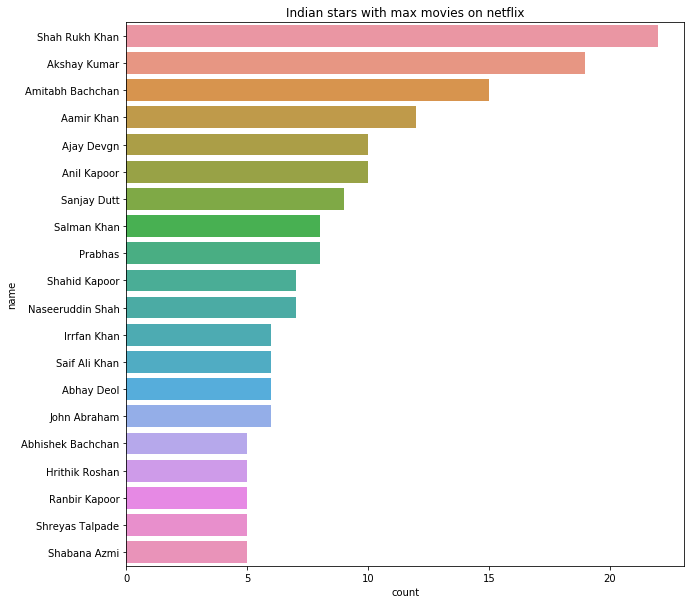

In [18]:
df9=data[data.type=="Movie"]
indcast=[]
ind=df9.query('country=="India"')
for i in ind['cast']:
    indcast.append(i)
newls=[]
for i in indcast:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=ind_df,order = ind_df['name'].value_counts().head(20).index)
plt.title("Indian stars with max movies on netflix")
plt.show()

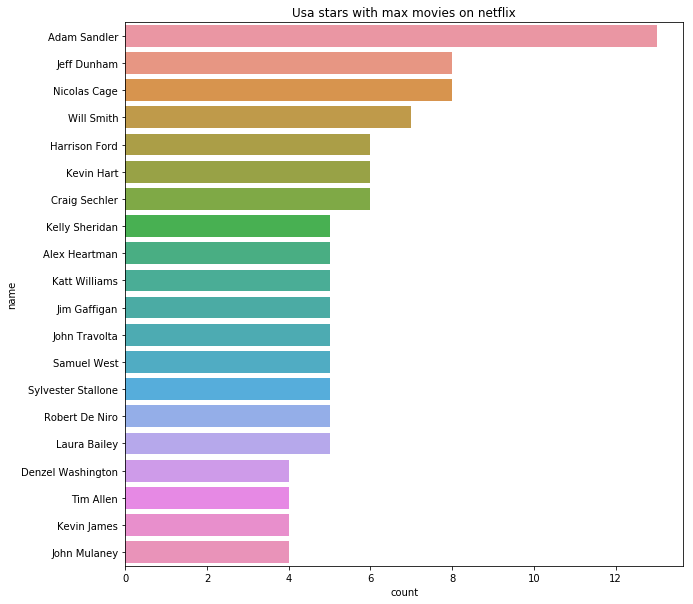

In [19]:
df9=data[data.type=="Movie"]
usacast=[]
usa=df9.query('country=="United States"')
for i in usa['cast']:
    usacast.append(i)
newls=[]
for i in usacast:
    newls.append(str(i).split(',')[0])
usadf=pd.DataFrame(newls,columns=['name'])
usa_df=usadf.drop(usadf.query('name=="nan"').index)
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=usa_df,order = usa_df['name'].value_counts().head(20).index)
plt.title("Usa stars with max movies on netflix")
plt.show()

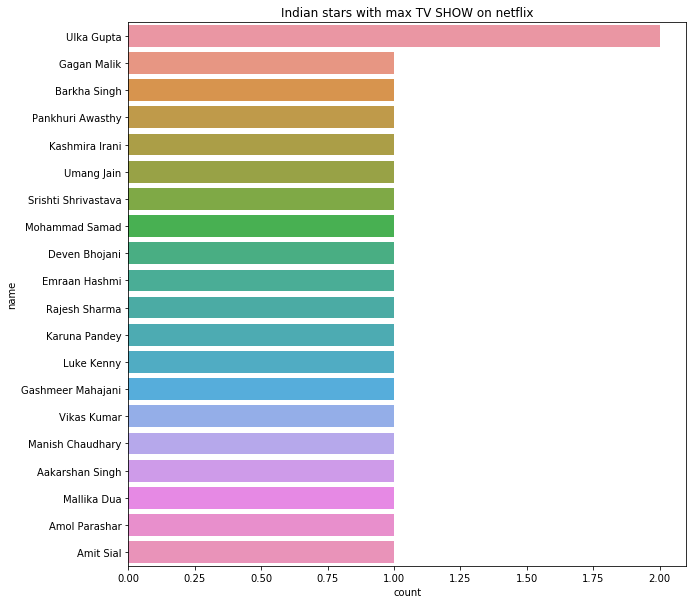

In [20]:
df9=data[data.type=="TV Show"]
indcast=[]
ind=df9.query('country=="India"')
for i in ind['cast']:
    indcast.append(i)
newls=[]
for i in indcast:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=ind_df,order = ind_df['name'].value_counts().head(20).index)
plt.title("Indian stars with max TV SHOW on netflix")
plt.show()

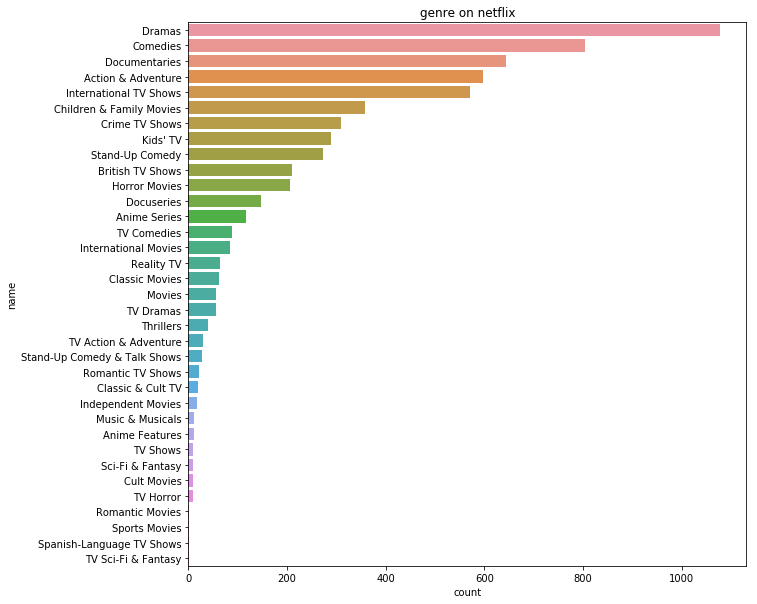

In [21]:

l1=[]
for i in data['listed_in']:
    l1.append(i)
newls=[]
for i in l1:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=ind_df,order = ind_df['name'].value_counts().index)
plt.title("genre on netflix")
plt.show()

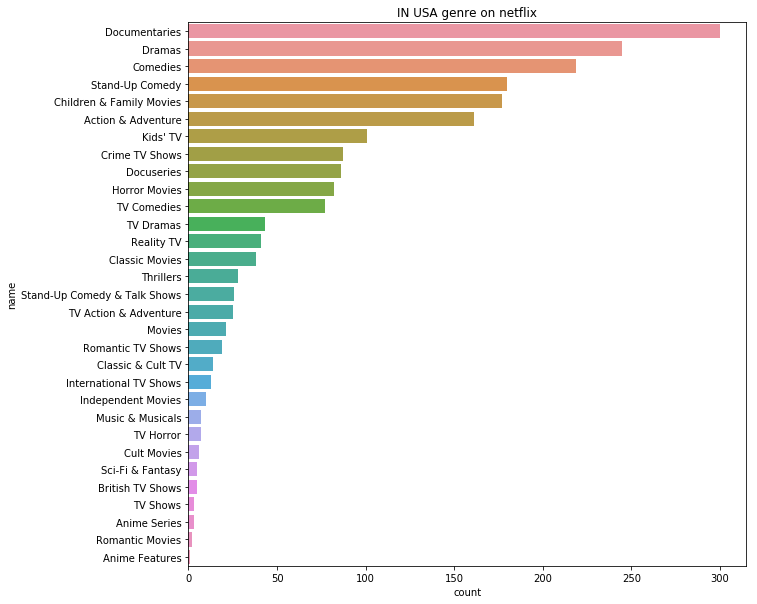

In [22]:
d=data.query('country=="United States"')
l1=[]
for i in d['listed_in']:
    l1.append(i)
newls=[]
for i in l1:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=ind_df,order = ind_df['name'].value_counts().index)
plt.title("IN USA genre on netflix")
plt.show()

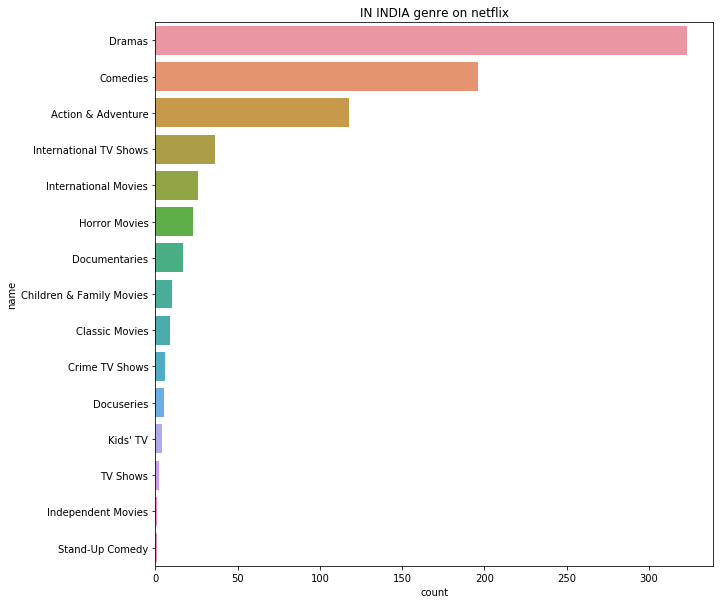

In [23]:
d=data.query('country=="India"')
l1=[]
for i in d['listed_in']:
    l1.append(i)
newls=[]
for i in l1:
    newls.append(str(i).split(',')[0])
inddf=pd.DataFrame(newls,columns=['name'])
ind_df=inddf.drop(inddf.query('name=="nan"').index)
plt.figure(figsize=(10,10))
sns.countplot(y='name',data=ind_df,order = ind_df['name'].value_counts().index)
plt.title("IN INDIA genre on netflix")
plt.show()

In [24]:
!pip install rake-nltk

  Created wheel for rake-nltk: filename=rake_nltk-1.0.4-py2.py3-none-any.whl size=7819 sha256=ba022cf41fd09dd76a1cf61fc8c7fc6d4f1fb8c8fd5de561ced4868a42936511
  Stored in directory: /root/.cache/pip/wheels/ad/4f/6b/a5e7778f5c084d8b7c2c5fe9d37eb806f5ff5fee5e8ee17342
Successfully built rake-nltk


In [25]:
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
data2 = data[['title','director','cast','listed_in','description']]
data2.head()

,title,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,NaN,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...


In [27]:
data2['director']=data2['director'].fillna(' ')
data2['director']=data2['director'].astype('str')
data2['cast']=data2['cast'].fillna(' ')
data2['cast']=data2['cast'].astype('str')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [28]:
data2['Description']=""
for i ,r in data2.iterrows():
    rake=Rake()
    
    rake.extract_keywords_from_text(r['description'])
    score_keyword=rake.get_word_degrees()
    a=''.join(r['listed_in'].split(',')).lower()
    b=''.join(r['director'].replace(' ','').split(',')).lower()
    c=''.join(r['cast'].replace(' ','').split(',')).lower()
    k = ' '.join(list(score_keyword.keys()))
    r['Description']=a+' '+b+' '+c+' '+k
data3=data2[['title','Description']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data3.sample(5)

,title,Description
1644,Rampant,action & adventure horror movies international...
2958,Enemy,independent movies thrillers denisvilleneuve j...
5129,Bountiful Blessings,international tv shows tv dramas tv sci-fi & f...
3227,Marvel's Hulk: Where Monsters Dwell,children & family movies sci-fi & fantasy mitc...
3782,Thumper,dramas thrillers jordanross elizataylorpablosc...


In [30]:
count=CountVectorizer()
matrix=count.fit_transform(data3['Description'])
cosine_sim = cosine_similarity(matrix,matrix)
print(cosine_sim)

[[1.         0.         0.         ... 0.11268723 0.04199605 0.04454354]
 [0.         1.         0.05976143 ... 0.         0.         0.        ]
 [0.         0.05976143 1.         ... 0.         0.15430335 0.10910895]
 ...
 [0.11268723 0.         0.         ... 1.         0.         0.        ]
 [0.04199605 0.         0.15430335 ... 0.         1.         0.27498597]
 [0.04454354 0.         0.10910895 ... 0.         0.27498597 1.        ]]


In [31]:
ind= pd.Series(data3['title'])
def recommend(name):
    movie=[]
    idx = ind[ind == name].index[0]
    sort_index = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10 = sort_index.iloc[1:11]
    for i in top_10.index:
        movie.append(ind[i])
    return movie

In [32]:
recommend('3Below: Tales of Arcadia')

['Trollhunters',
 'Lost in Space',
 'The Dragon Prince',
 "Oh No! It's an Alien Invasion",
 'The 100',
 'DreamWorks How to Train Your Dragon Legends',
 'The Shannara Chronicles',
 'She-Ra and the Princesses of Power',
 'The New Legends of Monkey',
 'The I-Land']

In [33]:
recommend('Khosla Ka Ghosla')

['Dil Dhadakne Do',
 'Papa the Great',
 '25 Kille',
 'Raja Hindustani',
 "Ali's Wedding",
 'Kaviyude Osyath',
 'Mala Kahich Problem Nahi',
 'In Family I Trust',
 'Shakti: The Power',
 'Live Twice, Love Once']

In [34]:
recommend('Dil Dhadakne Do')

['Chief Daddy',
 'Khosla Ka Ghosla',
 'Raja Hindustani',
 'Zindagi Na Milegi Dobara',
 'Arisan 2',
 'Papa the Great',
 'Rukh',
 'Mansfield Park',
 'Bulbul Can Sing',
 'Adore']

In [35]:
recommend("Power Rangers Dino Thunder")

['Power Rangers Super Samurai',
 'Liv and Maddie',
 'Power Rangers Lost Galaxy',
 'Power Rangers Zeo',
 'Power Rangers Ninja Storm',
 'Miniforce X',
 'Mighty Morphin Power Rangers',
 'Inspector Gadget',
 'Power Rangers RPM',
 'Power Rangers Wild Force']